# Mapa Térmico de Densidade de Energia por km²

In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
# estado_sp = gpd.read_file(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\SP_Municipios_2022.shp")
# enel_sp = gpd.read_file("SP_BDGD_ENEL.shp") #conj no bdgd
# ponnot = gpd.read_file(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\PONNOT.shp", low_memory=False)

# ucat = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UCAT_tab.csv")
# ucmt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UCMT_tab.csv")
# ucbt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UCBT_tab.csv", low_memory=False)

# ugat = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UGAT_tab.csv", sep=",")
# ugmt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UGMT_tab.csv", sep=";")
# ugbt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\UGBT_tab.csv", sep=";")

# sub = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\SUB.csv", sep=";")
# pt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\PT.csv", sep=",")
# pnt = pd.read_csv(r"C:\Users\joaov\OneDrive\Documentos\GitHub\CEAMAZON-ENEL\PNT.csv", sep=",")

In [ ]:
estado_sp = gpd.read_file(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\SP_Municipios_2022.shp")
enel_sp = gpd.read_file("SP_BDGD_ENEL.shp") #conj no bdgd
ponnot = gpd.read_file(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PONNOT.shp", low_memory=False)

ucat = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCAT_tab.csv")
ucmt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCMT_tab.csv")
ucbt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UCBT_tab.csv", low_memory=False)

ugat = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGAT_tab.csv", sep=",")
ugmt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGMT_tab.csv", sep=";")
ugbt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\UGBT_tab.csv", sep=";")

sub = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\SUB.csv", sep=";")
pt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PT.csv", sep=",")
pnt = pd.read_csv(r"H:\Meu Drive\Mestrado\ENEL\CEAMAZON-ENEL\PNT.csv", sep=",")

In [2]:
enel_sp = gpd.read_file("SP_BDGD_ENEL.shp") #conj no bdgd

<Axes: >

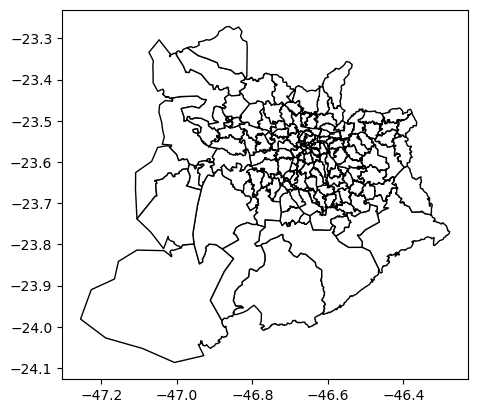

In [26]:
enel_sp.plot(color="white", edgecolor="black")

In [3]:
ucbt_01 = gpd.read_file(r"H:\Meu Drive\Mestrado\ENEL\BDGD_ENEL_2023\UCBT_01.shp", )

In [4]:
ucbt_01_filtrada = ucbt_01[(ucbt_01["ENE_01"] < 5000)]

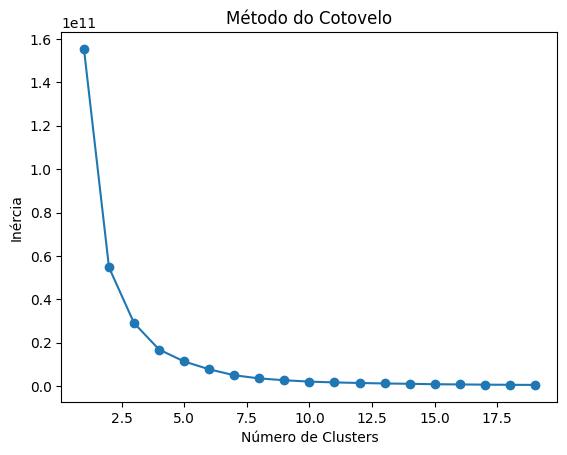

In [16]:
# Calcular inércia para diferentes números de clusters
inertias = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0).fit(ucbt_01_filtrada[['ENE_01']])
    inertias.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.plot(range(1, 20), inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


c:\Users\jvalv\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


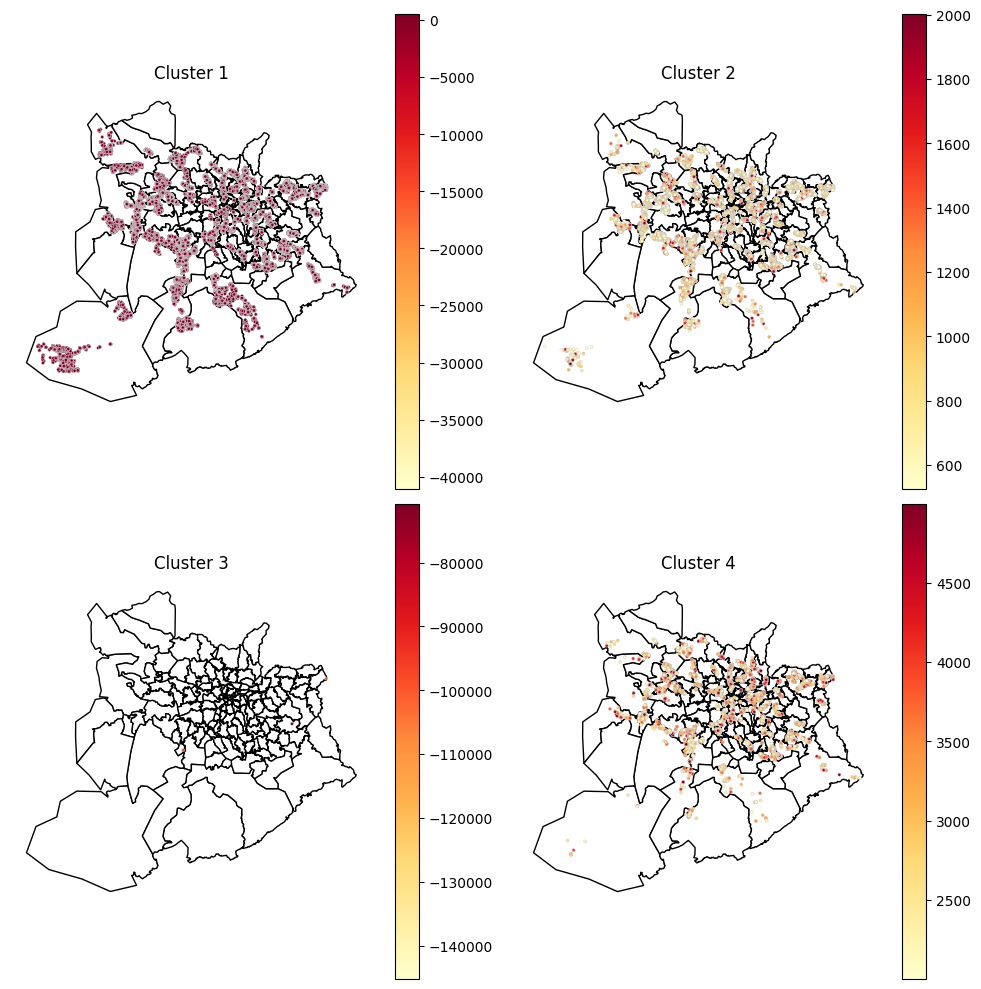

In [8]:
# Escolha o número ótimo de clusters visualmente, por exemplo, 4
optimal_clusters = 4

# Dividir em clusters usando o número ótimo
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=0).fit(ucbt_01_filtrada[['ENE_01']])
ucbt_01_filtrada['cluster'] = kmeans.labels_

fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # Ajuste de acordo com o número ótimo

for i, ax in enumerate(axes.flatten()):
    enel_sp.plot(ax=ax, color="white", edgecolor="black") # Plotando o mapa primeiro
    ucbt_01_filtrada[ucbt_01_filtrada['cluster'] == i].plot(ax=ax, column="ENE_01", cmap="YlOrRd", markersize=5, linewidth=0.3, edgecolor="0.8", legend=True)
    ax.set_title(f'Cluster {i+1}')
    ax.axis('off') # Para remover os eixos

plt.tight_layout()
plt.savefig("clusters.svg", format="svg")
plt.show()



In [ ]:
ucbt_01_filtrada_baixa = ucbt_01_filtrada[ucbt_01_filtrada["ENE_01"] < 600]


In [ ]:
ucbt_01_filtrada_media = ucbt_01_filtrada[(ucbt_01_filtrada["ENE_01"] > 600) & (ucbt_01_filtrada["ENE_01"] < 1000)] 


In [ ]:
ucbt_01_filtrada_alta = ucbt_01_filtrada[(ucbt_01_filtrada["ENE_01"] > 1000) & (ucbt_01_filtrada["ENE_01"] < 5000)] 

In [ ]:
fig, ax = plt.subplots(1, 1)

ucbt_01_filtrada_baixa.plot(column="ENE_01", cmap="YlOrRd", linewidth=0.3, ax=ax, edgecolor="0.8", legend=True)

In [ ]:
fig, ax = plt.subplots(1, 1)

ucbt_01_filtrada_media.plot(column="ENE_01", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

In [ ]:
fig, ax = plt.subplots(1, 1)

ucbt_01_filtrada_alta.plot(column="ENE_01", cmap="YlOrRd", linewidth=0.3, ax=ax, edgecolor="0.8", legend=True)

In [ ]:
ucbt_01_zeradas = ucbt_01[ucbt_01["ENE_01"] == 0]

In [ ]:
ucbt_01_zeradas

In [ ]:
def map_conj(mapa):
    ene_conj = []
    ger_conj = []
    for conjunto in mapa.COD_ID:
        ene_conj.append(ucbt[ucbt.CONJ == int(conjunto)]["ENE_01"].sum() + ucmt[ucmt.CONJ == int(conjunto)]["ENE_01"].sum() + ucat[ucat.CONJ == int(conjunto)]["ENE_P_01"].sum() + ucat[ucat.CONJ == int(conjunto)]["ENE_F_01"].sum())
        ger_conj.append(ugbt[ugbt.CONJ == int(conjunto)]["ENE_01"].sum() + ugmt[ugmt.CONJ == int(conjunto)]["ENE_01"].sum() + ugat[ugat.CONJ == int(conjunto)]["ENE_P_01"].sum() + ugat[ugat.CONJ == int(conjunto)]["ENE_F_01"].sum())
    mapa["ENE_TOTAL_01"] = ene_conj
    mapa["DENSIDADE_LOAD"] = mapa["ENE_TOTAL_01"]/mapa["Shape_Area"]
    df_consumo = mapa[mapa["ENE_TOTAL_01"] != 0]
    mapa["GER_TOTAL_01"] = ger_conj
    mapa["DENSIDADE_GERACAO"] = mapa["GER_TOTAL_01"]/mapa["Shape_Area"]
    df_geracao = mapa[mapa["GER_TOTAL_01"] != 0]

    return df_consumo, df_geracao

def map_municipio(mapa):
    ene_conj = []
    ger_conj = []
    for conjunto in mapa.CD_MUN:
        ene_conj.append(ucbt[ucbt.MUN == int(conjunto)]["ENE_01"].sum() + ucmt[ucmt.MUN == int(conjunto)]["ENE_01"].sum() + ucat[ucat.MUN == int(conjunto)]["ENE_P_01"].sum() + ucat[ucat.MUN == int(conjunto)]["ENE_F_01"].sum())
        ger_conj.append(ugbt[ugbt.MUN == int(conjunto)]["ENE_01"].sum() + ugmt[ugmt.MUN == int(conjunto)]["ENE_01"].sum() + ugat[ugat.MUN == int(conjunto)]["ENE_P_01"].sum() + ugat[ugat.MUN == int(conjunto)]["ENE_F_01"].sum())
    mapa["ENE_TOTAL_01"] = ene_conj
    mapa["DENSIDADE_LOAD"] = mapa["ENE_TOTAL_01"]/mapa["AREA_KM2"]
    df_consumo = mapa[mapa["ENE_TOTAL_01"] != 0]
    mapa["GER_TOTAL_01"] = ger_conj
    mapa["DENSIDADE_GERACAO"] = mapa["GER_TOTAL_01"]/mapa["AREA_KM2"]
    df_geracao = mapa[mapa["GER_TOTAL_01"] != 0]

    return df_consumo, df_geracao

In [ ]:
mapa_conj_consumo, mapa_conj_geracao = map_conj(enel_sp)

In [ ]:
mapa_mun_consumo, mapa_mun_geracao = map_municipio(estado_sp)

In [ ]:
mapa_mun_consumo.plot()

In [ ]:
mapa_mun_geracao.plot()

In [ ]:
len(estado_sp)

In [ ]:
estado_sp.plot()

In [ ]:
ponnot.plot()

In [ ]:
enel_sp.plot()

In [ ]:
fig, ax = plt.subplots(1, 1)

estado_sp.plot(ax=ax, color='blue')  
enel_sp.plot(ax=ax, color='red')  

plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1)
mapa_mun_consumo.plot(column="DENSIDADE_LOAD", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

In [ ]:
fig, ax = plt.subplots(1, 1)
mapa_mun_geracao.plot(column="DENSIDADE_GERACAO", cmap="YlGn", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

In [ ]:
fig, ax = plt.subplots(1, 1)
mapa_conj_consumo.plot(column="DENSIDADE_LOAD", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

In [ ]:
fig, ax = plt.subplots(1, 1)
mapa_conj_geracao.plot(column="DENSIDADE_GERACAO", cmap="GnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)

In [ ]:
x = ponnot.geometry.x
y = ponnot.geometry.y
plt.figure(figsize=(10, 10))
sns.kdeplot(x, y, cmap='viridis', fill=True)
plt.colorbar(label='Densidade')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Calor')
plt.show()

In [ ]:
pontos_bt = ucbt.PN_CON.to_list()
ponnot_ucbt = ponnot[ponnot.COD_ID.isin(pontos_bt)]

In [ ]:
ponnot_ucbt.COD_ID[0]

In [ ]:
print("teste")